# Social Media Sentiment Analysis: Data Processing and Visualization.

## Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

## Importing Dataset

In [23]:
df = pd.read_csv(r'sentimentdataset.csv')
df

,Unnamed: 0,Unnamed: 0.1,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


## Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
Unnamed: 0      732 non-null int64
Unnamed: 0.1    732 non-null int64
Text            732 non-null object
Sentiment       732 non-null object
Timestamp       732 non-null object
User            732 non-null object
Platform        732 non-null object
Hashtags        732 non-null object
Retweets        732 non-null float64
Likes           732 non-null float64
Country         732 non-null object
Year            732 non-null int64
Month           732 non-null int64
Day             732 non-null int64
Hour            732 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [5]:
df.nunique()

Unnamed: 0      732
Unnamed: 0.1    732
Text            707
Sentiment       279
Timestamp       683
User            685
Platform          4
Hashtags        697
Retweets         26
Likes            38
Country         115
Year             14
Month            12
Day              31
Hour             22
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [7]:
df.shape

(732, 15)

In [8]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [9]:
# Sentiment Distribution
print(df['Sentiment'].value_counts())

 Positive          44
 Joy               42
 Excitement        32
 Contentment       14
 Happy             14
                   ..
 Jealousy           1
 Thrill             1
 Excitement         1
 LostLove           1
 PlayfulJoy         1
Name: Sentiment, Length: 279, dtype: int64


## Data Cleaning

In [10]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1','Timestamp'], axis = 1)
df.head()

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [11]:
df['Country'] = df['Country'].str.strip()
df['Platform'] = df['Platform'].str.strip()

## EDA (Exploratory Data Analysis)

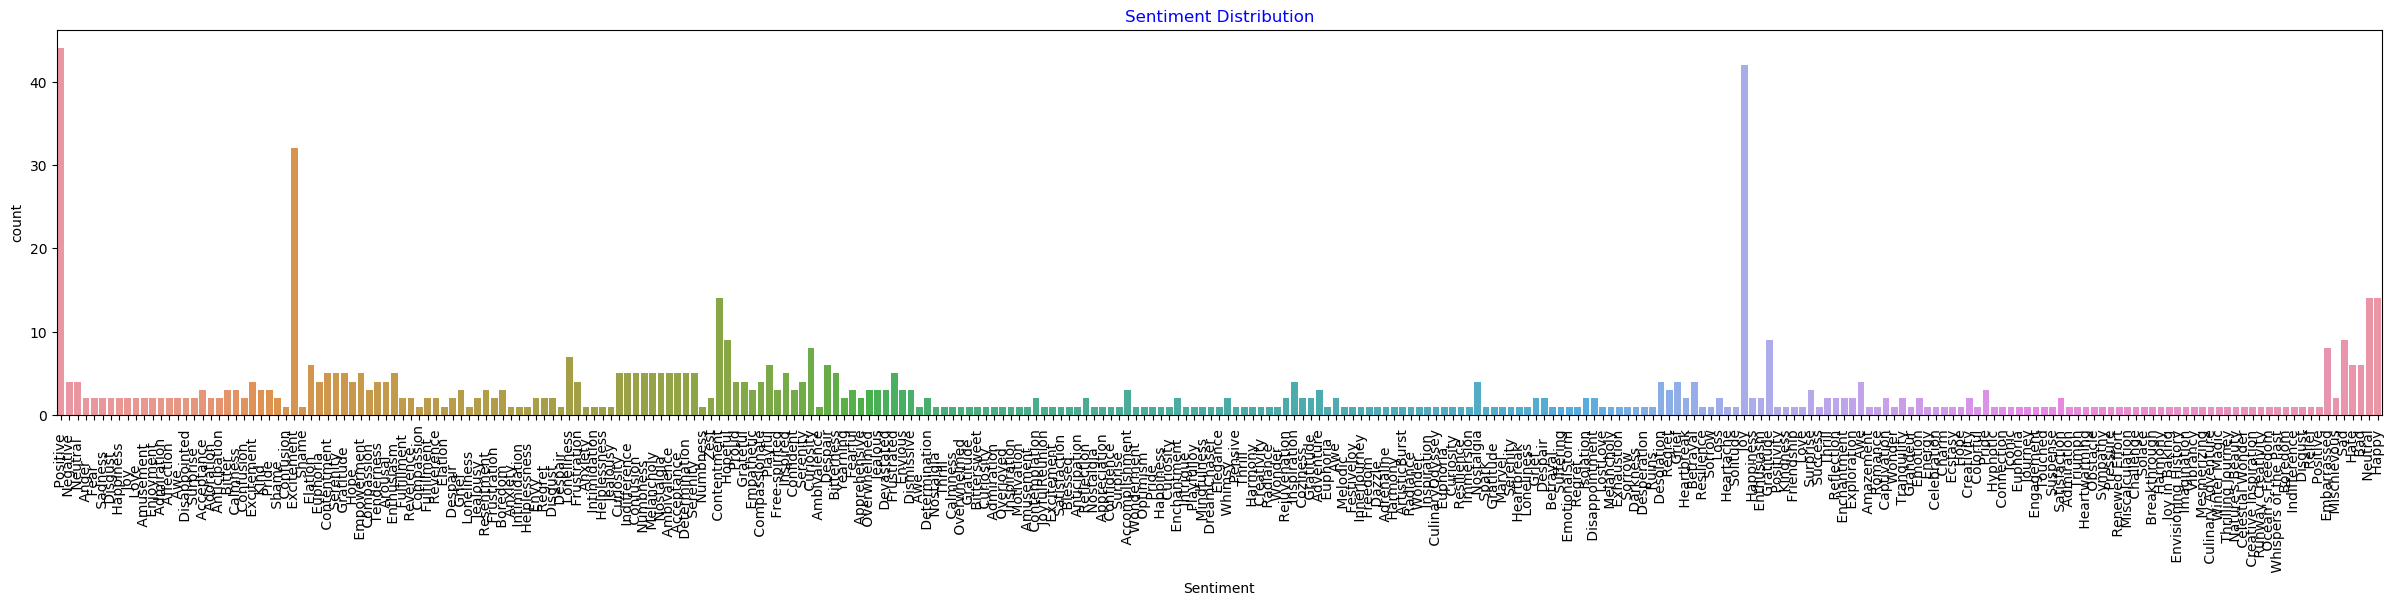

In [12]:
plt.figure(figsize = (30,5))
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution',color = 'blue')
plt.xticks(rotation = 90)
plt.show()

# Result:


from the above plot,we can observe that how many times each type of sentiment is repeated.

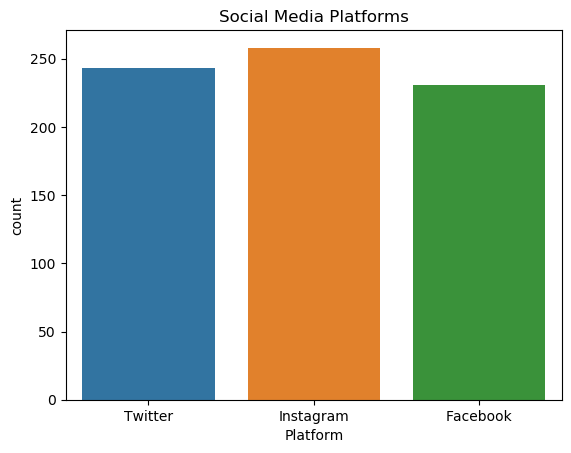

In [13]:
sns.countplot(data = df, x='Platform',color=None)
plt.title('Social Media Platforms')
plt.show()

# RESULT:-

The Most used social media platform is Instagram
The Least used social media platform is Blue Twitter

In [14]:
df['Month'].unique()

array([ 1,  2,  3,  5,  8,  6, 11,  4,  9,  7, 10, 12], dtype=int64)

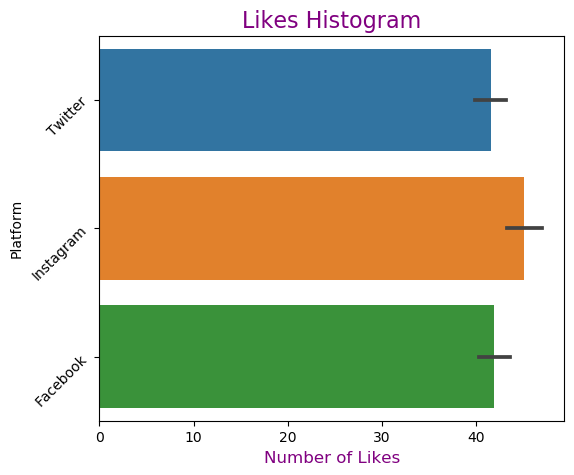

In [15]:
import seaborn as sns
fig = plt.figure(figsize = (6,5))
sns.barplot(data = df, x = 'Likes', y = 'Platform')
plt.title('Likes Histogram', fontsize = 16, color  = 'purple')
plt.xlabel('Number of Likes', fontsize = 12, color  = 'purple')
plt.yticks(rotation=45, )
plt.show()

# RESULT:-

The Social media platform with most number of likes is Instagram
The Social media platform with least number of likes is Blue Twitter

In [20]:
df['Retweets'].unique()

array([15.,  5., 20.,  8., 12., 25., 10., 30., 18., 22.,  7., 28.,  9.,
       14., 13., 11., 17., 19., 16., 21., 23., 24., 40., 35., 26., 27.])

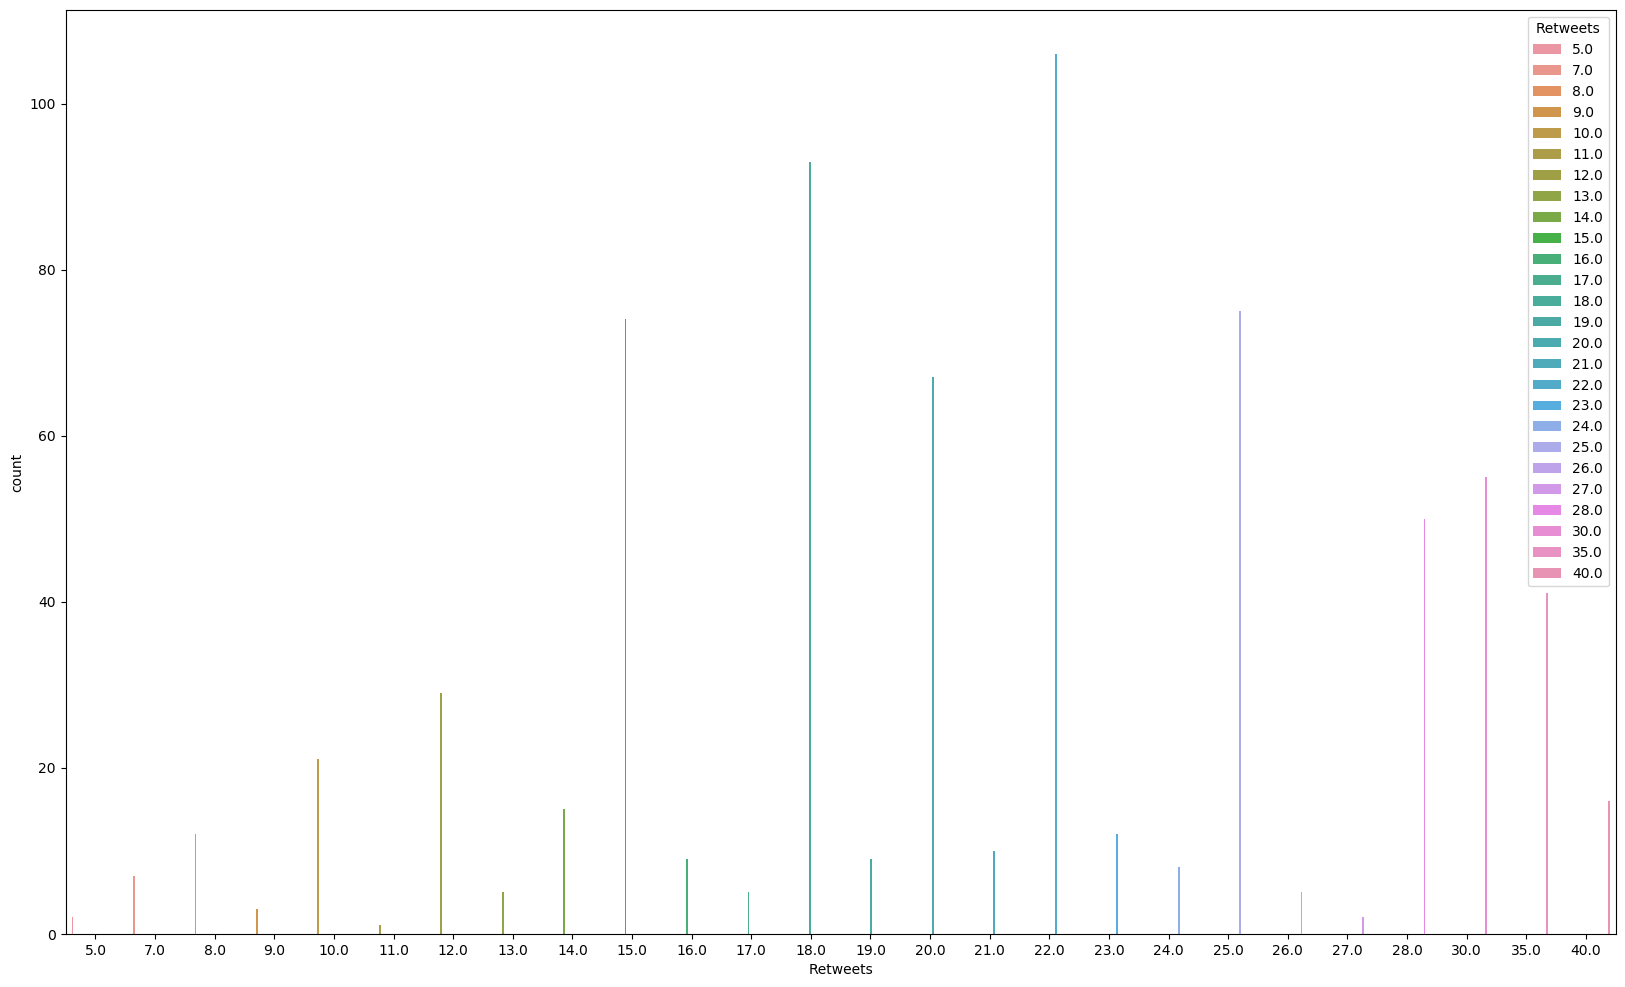

In [22]:
plt.figure(figsize=(20,12))
sns.countplot(x='Retweets',data=df,hue='Retweets')

# RESULT:-

In [ ]:
from the graph we can conclude that,at the point of Retweets=22.2 it repeated more number of times

In [ ]:
text = " ".join(review for review in df.Text)
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Text')
plt.show()

# CONCLUSION:-

With the help of the program, we can analyze the different types of user sentiments that they are inciting to in Social Media platforms like Instagram, Facebook, and Twitter.we can also analysing that ,In social media the more number of people are in positive attitude it leads to the best for the society. 